## Hampel TESTBENCH

This notebook takes one pixel and gives out the correct pixel (if it is an outlier, otherwise gives the same pixel back) using AXI-STREAM. It is then compared with ideal version of the profile itself

In [144]:
from pynq import Overlay
import numpy as np
from pynq import Xlnk
from pynq.lib import dma
from scipy.linalg import dft
import matplotlib.pyplot as plt

In [145]:
ol=Overlay('design_1_wrapper.bit')

In [146]:
dma1=ol.axi_dma_0

In [153]:
NUM_SAMPLES = 1920
ramp = np.loadtxt('./ramp/outlier_1.dat')
dhc = np.loadtxt('./dhc/outlier_1.dat')
real = np.loadtxt('./real/profile_8.dat')

In [154]:
xlnk = Xlnk()

ramp_in_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32)           
ramp_out_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32) 
np.copyto(ramp_in_pixel, ramp)

dhc_in_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32)           
dhc_out_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32) 
np.copyto(dhc_in_pixel, dhc)

real_in_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32)           
real_out_pixel = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.float32) 
np.copyto(real_in_pixel, real)

In [155]:
# Ramp
dft_ip = ol.hfilter_0
dft_ip.write(0x00,1)
# Start the DMA send and recv channels.
dma1.recvchannel.start()
dma1.sendchannel.start()
dma1.sendchannel.transfer(ramp_in_pixel)
dma1.recvchannel.transfer(ramp_out_pixel)      
# Wait for the DMA to send and recv data.
dma1.recvchannel.wait()
dma1.sendchannel.wait()

# Double Half-Circle
dft_ip = ol.hfilter_0
dft_ip.write(0x00,1)
# Start the DMA send and recv channels.
dma1.recvchannel.start()
dma1.sendchannel.start()
dma1.sendchannel.transfer(dhc_in_pixel)
dma1.recvchannel.transfer(dhc_out_pixel)
# Wait for the DMA to send and recv data.
dma1.recvchannel.wait()
dma1.sendchannel.wait()

# Real Data
dft_ip = ol.hfilter_0
dft_ip.write(0x00,1)
# Start the DMA send and recv channels.
dma1.recvchannel.start()
dma1.sendchannel.start()
dma1.sendchannel.transfer(real_in_pixel)
dma1.recvchannel.transfer(real_out_pixel)
# Wait for the DMA to send and recv data.
dma1.recvchannel.wait()
dma1.sendchannel.wait()

## Verifying Functionality 
### ramp

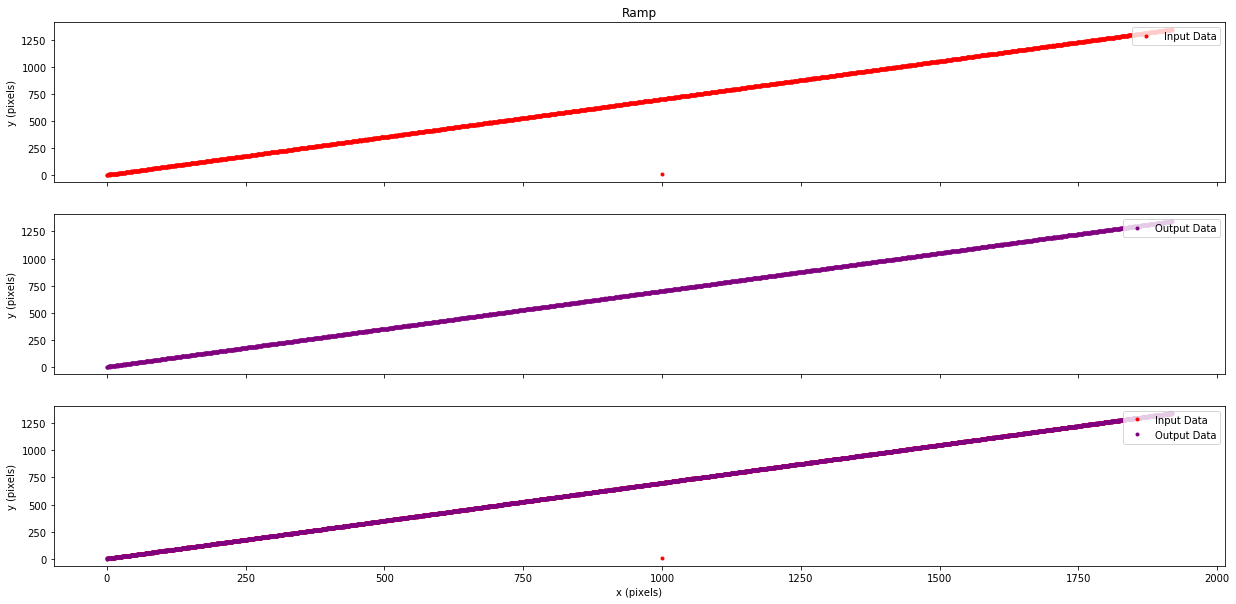

In [156]:
plt.rcParams['figure.figsize'] = [21, 10]

x = np.arange(1920)

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(x, ramp_in_pixel,'.', color='red')
axs[1].plot(x, ramp_out_pixel, '.',color='purple')
axs[2].plot(x, ramp_in_pixel,'.',color='red')
axs[2].plot(x, ramp_out_pixel, '.',color='purple')
axs[0].set(title='Ramp',ylabel='y (pixels)')
axs[1].set(ylabel='y (pixels)')
axs[2].set(xlabel='x (pixels)', ylabel='y (pixels)')
axs[0].legend(['Input Data'], loc='upper right')
axs[1].legend(['Output Data'], loc='upper right')
axs[2].legend(['Input Data', 'Output Data'], loc='upper right')
plt.show()

### Double Half-Circle

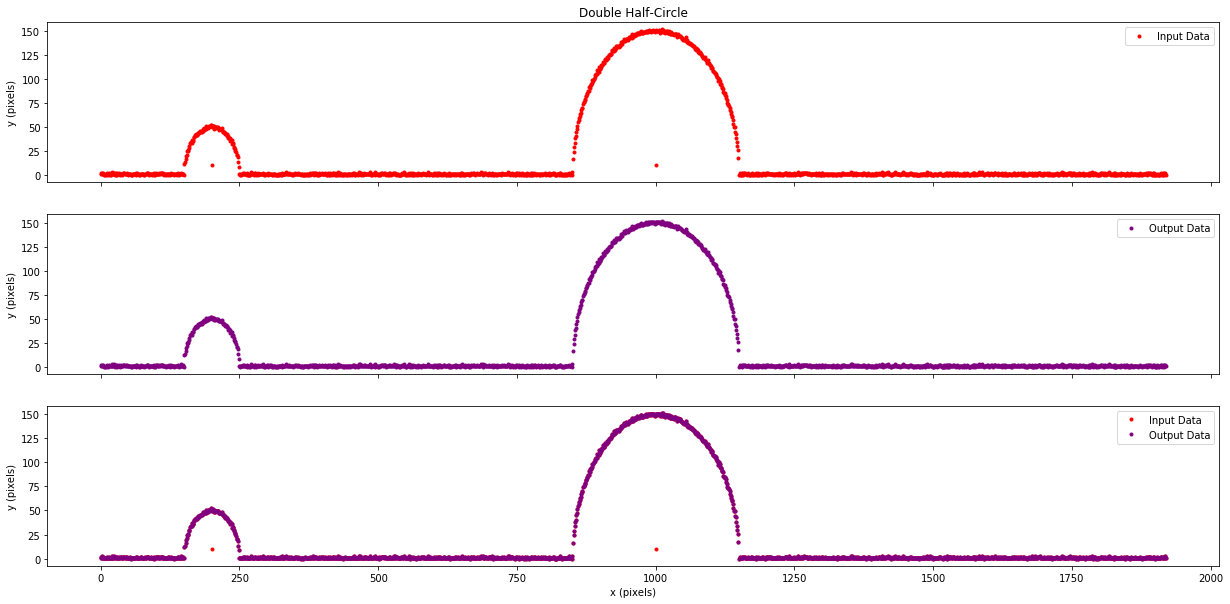

In [157]:
plt.rcParams['figure.figsize'] = [21, 10]

x = np.arange(1920)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].plot(x, dhc_in_pixel,'.', color='red')
axs[1].plot(x, dhc_out_pixel, '.', color='purple')
axs[2].plot(x, dhc_in_pixel,'.', color='red')
axs[2].plot(x, dhc_out_pixel, '.', color='purple')

axs[0].set(title='Double Half-Circle',ylabel='y (pixels)')
axs[1].set(ylabel='y (pixels)')
axs[2].set(xlabel='x (pixels)', ylabel='y (pixels)')
axs[0].legend(['Input Data'], loc='upper right')
axs[1].legend(['Output Data'], loc='upper right')
axs[2].legend(['Input Data', 'Output Data'], loc='upper right')
plt.show()

### Real Data from Cognex

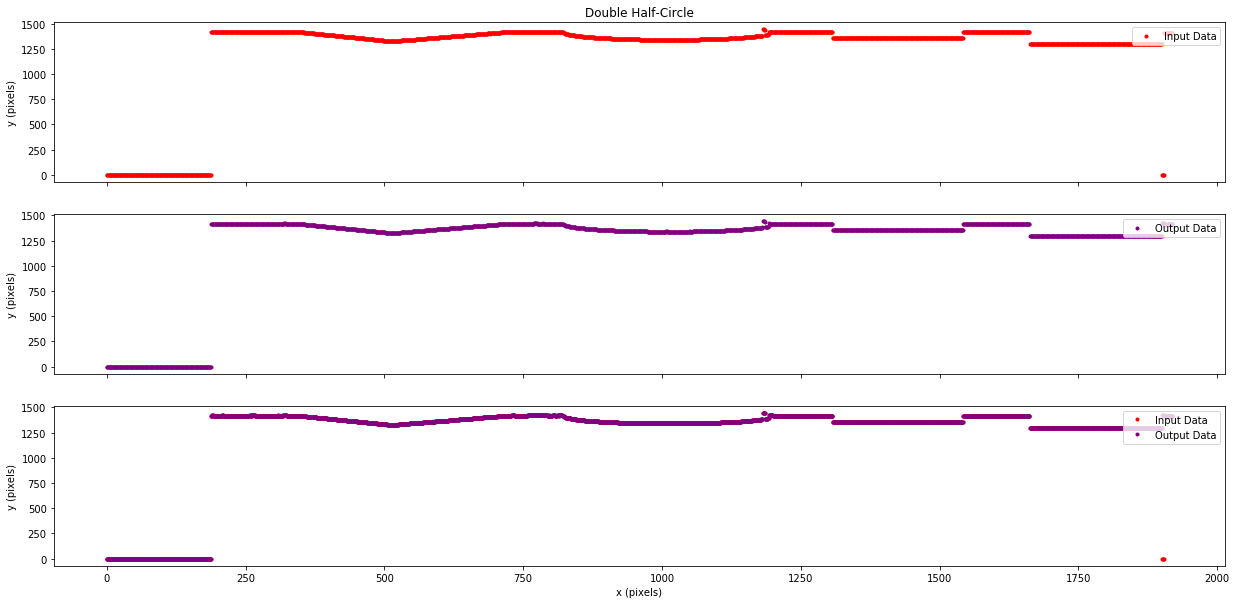

In [158]:
plt.rcParams['figure.figsize'] = [21, 10]

x = np.arange(1920)

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(x, real_in_pixel,'.', color='red')
axs[1].plot(x, real_out_pixel, '.', color='purple')
axs[2].plot(x, real_in_pixel,'.', color='red')
axs[2].plot(x, real_out_pixel, '.', color='purple')
axs[0].set(title='Double Half-Circle',ylabel='y (pixels)')
axs[1].set(ylabel='y (pixels)')
axs[2].set(xlabel='x (pixels)', ylabel='y (pixels)')
axs[0].legend(['Input Data'], loc='upper right')
axs[1].legend(['Output Data'], loc='upper right')
axs[2].legend(['Input Data', 'Output Data'], loc='upper right')
plt.show()